<a href="https://colab.research.google.com/github/FernandoBRdgz/diplomado_ds_mod4/blob/main/4.3%20Redes%20Neuronales%20Convolucionales/4.3.4%20Modelos%20personalizados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelar con conjuntos de datos personalizado (Clasificación Binaria)

Ahora se explorará cómo trabajar con un conjunto de datos más realista.

## Conjunto de Datos (Health Care)

Este conjunto de datos se tomó del sitio web oficial de los NIH: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

El conjunto de datos contiene 2 carpetas, una para cada clase:
*Infectado* y *No infectado*

Este conjunto de datos contiene un total de 27,558 imágenes

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
generation = "MOD4GEN<x>"

In [ ]:
my_data_dir = f"/content/drive/MyDrive/{generation}/4.3 Redes Neuronales Convolucionales/datasets/cell_images/"
my_data_dir

'/content/drive/MyDrive/MOD4GEN17/4.3 Redes Neuronales Convolucionales/datasets/cell_images/'

In [ ]:
os.listdir(my_data_dir)

['train', 'val']

In [ ]:
train_path = os.path.join(my_data_dir, "train")
val_path = os.path.join(my_data_dir, "val")

In [ ]:
os.listdir(val_path)

['parasitized', 'uninfected']

In [ ]:
os.listdir(train_path)

['parasitized', 'uninfected']

## Visualización de datos

In [ ]:
os.listdir(os.path.join(train_path, "parasitized"))[0]

'C89P50ThinF_IMG_20150820_163347_cell_206.png'

In [ ]:
para_cell = os.path.join(train_path, "parasitized", os.listdir(os.path.join(train_path, "parasitized"))[0])
para_cell

'/content/drive/MyDrive/MOD4GEN17/4.3 Redes Neuronales Convolucionales/datasets/cell_images/train/parasitized/C89P50ThinF_IMG_20150820_163347_cell_206.png'

In [ ]:
para_img = imread(para_cell)

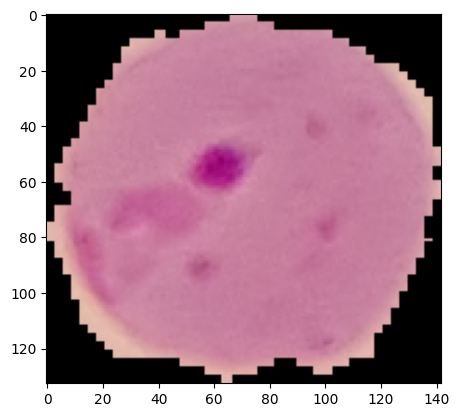

In [ ]:
plt.imshow(para_img);

In [ ]:
para_img.shape

(133, 142, 3)

In [ ]:
unifected_cell_path = os.path.join(train_path, "uninfected", os.listdir(os.path.join(train_path, "uninfected"))[0])
unifected_cell_path

'/content/drive/MyDrive/MOD4GEN17/4.3 Redes Neuronales Convolucionales/datasets/cell_images/train/uninfected/C86P47ThinF_IMG_20150820_125057_cell_73.png'

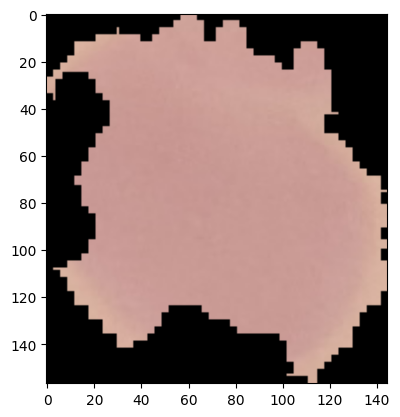

In [ ]:
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell);

In [ ]:
unifected_cell.shape

(157, 145, 3)

In [ ]:
len(os.listdir(os.path.join(train_path, "parasitized")))

12480

In [ ]:
len(os.listdir(os.path.join(train_path, "uninfected")))

12480

In [ ]:
unifected_cell.shape

(157, 145, 3)

In [ ]:
para_img.shape

(133, 142, 3)

In [ ]:
# Verifica las dimensiones de todas las imágenes en un directorio

dim1 = []
dim2 = []
for image_filename in os.listdir(os.path.join(val_path, "uninfected")):
    img = imread(os.path.join(val_path, "uninfected", image_filename))
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

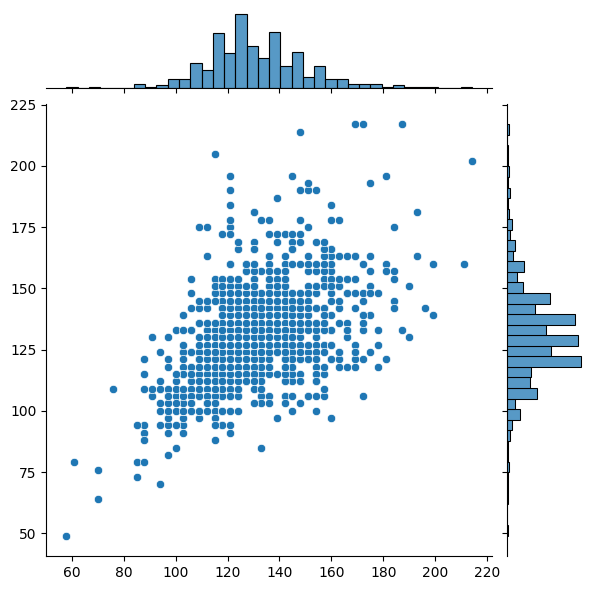

In [ ]:
sns.jointplot(x=dim1, y=dim2);

In [ ]:
np.mean(dim1), np.mean(dim2)

(130.92538461538462, 130.75)

In [ ]:
image_shape = (130, 130, 3)

## Aumentación de Datos (Data Augmentation)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# help(ImageDataGenerator)

In [ ]:
train_image_gen = ImageDataGenerator(rotation_range=20,
                                     width_shift_range=0.10,
                                     height_shift_range=0.10,
                                     rescale=1/255,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

In [ ]:
val_image_gen = ImageDataGenerator(rescale=1/255)

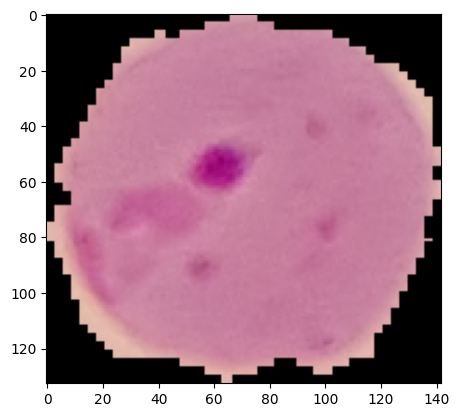

In [ ]:
plt.imshow(para_img);

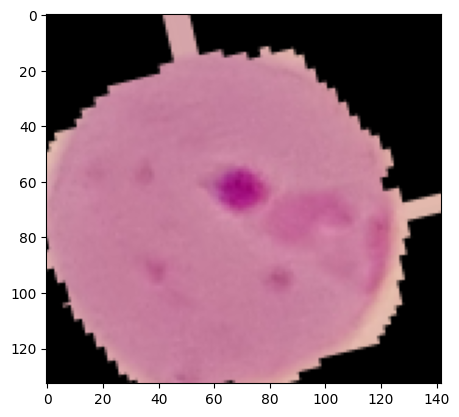

In [ ]:
plt.imshow(train_image_gen.random_transform(para_img));

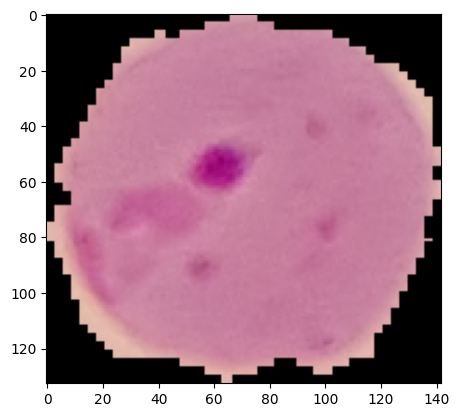

In [ ]:
plt.imshow(val_image_gen.random_transform(para_img));

Para utilizar `.flow_from_directory`, se deben organizar las imágenes en subdirectorios. Este es un requisito absoluto, de lo contrario, el método no funcionará. Los directorios solo deben contener imágenes de una clase, es decir, una carpeta por clase de imágenes.

Estructura:

* Carpeta de datos raíz
     * Clase 1
         * 0.jpg
         * 1.jpg
         * ...
     * Clase 2
         * 0.jpg
         * 1.jpg
         * ...
     * ...
     * Clase n

In [ ]:
train_image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [ ]:
val_image_gen.flow_from_directory(val_path)

Found 2600 images belonging to 2 classes.


## Diseño de arquitectura de la CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'recall'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

## Entrenamiento de Modelo

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
batch_size = 16

In [ ]:
image_shape

(130, 130, 3)

In [ ]:
train_image_gen = train_image_gen.flow_from_directory(train_path,
                                                      target_size=image_shape[:2],
                                                      color_mode='rgb',
                                                      batch_size=batch_size,
                                                      class_mode='binary',
                                                      shuffle=True)

Found 24958 images belonging to 2 classes.


In [ ]:
len(train_image_gen.classes)

24958

In [ ]:
val_image_gen = val_image_gen.flow_from_directory(val_path,
                                                  target_size=image_shape[:2],
                                                  color_mode='rgb',
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  shuffle=False)

Found 2600 images belonging to 2 classes.


In [ ]:
len(val_image_gen.classes)

2600

In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
# %%time
# results = model.fit_generator(train_image_gen, epochs=20, validation_data=val_image_gen, callbacks=[early_stop])

In [ ]:
# model.save(f"/content/drive/MyDrive/{generation}/4.3 Redes Neuronales Convolucionales/models/malaria_detector.h5")

## Evaluación de Modelo

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model(f"/content/drive/MyDrive/{generation}/4.3 Redes Neuronales Convolucionales/models/malaria_detector.h5")

In [ ]:
pred_probabilities = model.predict_generator(val_image_gen)
pred_probabilities

array([[2.8399541e-04],
       [3.2597428e-04],
       [3.8923562e-04],
       ...,
       [9.9034041e-01],
       [9.9879479e-01],
       [9.7582847e-01]], dtype=float32)

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix(val_image_gen.classes, predictions)

array([[1224,   76],
       [  43, 1257]])

In [ ]:
print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1300
           1       0.94      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



## Predicciones

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
parasitized_cell = os.path.join(val_path, "parasitized", os.listdir(os.path.join(val_path, "parasitized"))[42])

In [ ]:
parasitized_cell

'/content/drive/MyDrive/MOD4GEN17/4.3 Redes Neuronales Convolucionales/datasets/cell_images/val/parasitized/C132P93ThinF_IMG_20151004_152257_cell_137.png'

In [ ]:
image_shape

(130, 130, 3)

In [ ]:
my_image = image.load_img(para_cell, target_size=image_shape)

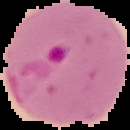

In [ ]:
my_image

In [ ]:
type(my_image)

PIL.Image.Image

In [ ]:
my_image = image.img_to_array(my_image)

In [ ]:
my_image.shape

(130, 130, 3)

In [ ]:
type(my_image)

numpy.ndarray

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
my_image.shape

(1, 130, 130, 3)

In [ ]:
val_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
model.predict(my_image)

1/1 [==============================] - 0s 195ms/step


array([[0.]], dtype=float32)